# MITRE ATT&CK Framework EDA
This dataset contains multiple sheets of data related to the attackers themselves, their strategies, and their targets. It could be highly useful to distinguish what kinds of targets Nation-State Threact Actors (NSTAs) aim for.

#### Supporting Questions
- What else might be of use?

## Importing Libraries
We'll use the standard libraries for data science and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data
First, we'll look at how many sheets this dataset has to see which one(s) suit(s) us the most. For now, we'll focus on the "groups" sheet. With the columns present in this sheet, we could theoretically build a clustering algorithm to see if NSTAs rely consistently on non-NSTAs?

In [2]:
sheet_names = enterprise_attack_framework = pd.ExcelFile('../data/mitre-enterprise-attack-v15.1.xlsx').sheet_names
print(sheet_names)

['techniques', 'tactics', 'software', 'groups', 'campaigns', 'mitigations', 'Enterprise ATT&CK matrix', 'relationships', 'datasources', 'citations']


## Preprocessing the Data
Here, we'll iterate over a dictionary we'll create by importing all sheets from the file at once. Then, we'll get a feel for the data by getting each's shape and checking its head. The aim is to see if any columns can act as foreign keys with which we can inner join these tables. If and once we've identified a way to join them, we'll identify the data types of this new table, process strings into dates, check for nulls and duplicates, remove white space from the column names, and ensure that the values are consistently formatted. From the looks of it, MITRE has given us an innerly-joined table of all these sheets in their "relationships" sheet, which contains information about the kind of attack

In [21]:
file = '../data/mitre-enterprise-attack-v15.1.xlsx' # Grab file
df_dict = pd.read_excel(file, sheet_name=None) # Create a dictionary of datasheets

# Assign sheets to dataframes
df_techniques = df_dict['techniques']
df_tactics = df_dict['tactics']
df_software = df_dict['software']
df_groups = df_dict['groups']
df_campaigns = df_dict['campaigns']
df_mitigations = df_dict['mitigations']
df_matrix = df_dict['Enterprise ATT&CK matrix']
df_relationships = df_dict['relationships']
df_datasources = df_dict['datasources']
df_citations = df_dict['citations']

# Function to see datatypes
def getDtypes(df):
    dtypes = df.dtypes
    print(dtypes)

# Iterate over all sheets in the dictionary
for sheet, df in df_dict.items():
    rows, columns = df.shape # Get number of rows and columns
    print(f"The sheet '{sheet}' has {rows} rows and {columns} columns.\n-----\n")
    getDtypes(df) # Get and print datatypes
    print(df.head(), '\n-----\n') # View the head

df_relationships.head()

The sheet 'techniques' has 637 rows and 23 columns.
-----

ID                         object
STIX ID                    object
name                       object
description                object
url                        object
created                    object
last modified              object
domain                     object
version                   float64
tactics                    object
detection                  object
platforms                  object
data sources               object
is sub-technique             bool
sub-technique of           object
defenses bypassed          object
contributors               object
permissions required       object
supports remote           float64
system requirements        object
impact type                object
effective permissions      object
relationship citations     object
dtype: object
          ID                                            STIX ID  \
0      T1548  attack-pattern--67720091-eee3-4d2d-ae16-826456...   
1  T1548.00

,source ID,source name,source ref,source type,mapping type,target ID,target name,target ref,target type,mapping description,STIX ID,created,last modified
0,C0028,2015 Ukraine Electric Power Attack,campaign--46421788-b6e1-4256-b351-f8beffd1afba,campaign,attributed-to,G0034,Sandworm Team,intrusion-set--381fcf73-60f6-4ab2-9991-6af3cbc...,group,(Citation: Andy Greenberg June 2017) (Citation...,relationship--4d407dda-944a-4974-b1c2-0a04d2c9...,27 September 2023,27 September 2023
1,C0025,2016 Ukraine Electric Power Attack,campaign--aa73efef-1418-4dbe-b43c-87a498e97234,campaign,attributed-to,G0034,Sandworm Team,intrusion-set--381fcf73-60f6-4ab2-9991-6af3cbc...,group,(Citation: US District Court Indictment GRU Un...,relationship--90647f03-38a4-4364-a3af-53640a81...,31 March 2023,31 March 2023
2,C0034,2022 Ukraine Electric Power Attack,campaign--df8eb785-70f8-4300-b444-277ba849083d,campaign,attributed-to,G0034,Sandworm Team,intrusion-set--381fcf73-60f6-4ab2-9991-6af3cbc...,group,(Citation: Mandiant-Sandworm-Ukraine-2022)(Cit...,relationship--d3717846-eaab-4fde-99f6-a972dec9...,27 March 2024,10 April 2024
3,C0011,C0011,campaign--b4e5a4a9-f3be-4631-ba8f-da6ebb067fac,campaign,attributed-to,G0134,Transparent Tribe,intrusion-set--e44e0985-bc65-4a8f-b578-211c858...,group,(Citation: Cisco Talos Transparent Tribe Educa...,relationship--751e795e-7c1a-4ba1-bb20-636aed02...,22 September 2022,22 September 2022
4,C0017,C0017,campaign--ba6dfa37-f401-4140-88b0-8938f2895e61,campaign,attributed-to,G0096,APT41,intrusion-set--18854f55-ac7c-4634-bd9a-352dd07...,group,(Citation: Mandiant APT41),relationship--990a03f8-5813-4fa8-b948-976730d4...,01 December 2022,01 December 2022


In [22]:
df_relationships.tail() # View the tail

,source ID,source name,source ref,source type,mapping type,target ID,target name,target ref,target type,mapping description,STIX ID,created,last modified
17319,S0350,zwShell,malware--54e8672d-5338-4ad1-954a-a7c986bee530,software,uses,T1082,System Information Discovery,attack-pattern--354a7f88-63fb-41b5-a801-ce3b37...,technique,[zwShell](https://attack.mitre.org/software/S0...,relationship--5f179b5c-497f-42da-bc32-360b6113...,30 January 2019,16 June 2021
17320,S0350,zwShell,malware--54e8672d-5338-4ad1-954a-a7c986bee530,software,uses,T1016,System Network Configuration Discovery,attack-pattern--707399d6-ab3e-4963-9315-d9d381...,technique,[zwShell](https://attack.mitre.org/software/S0...,relationship--7558a855-25fc-47cb-84ef-680f337f...,30 January 2019,16 June 2021
17321,S0350,zwShell,malware--54e8672d-5338-4ad1-954a-a7c986bee530,software,uses,T1033,System Owner/User Discovery,attack-pattern--03d7999c-1f4c-42cc-8373-e7690d...,technique,[zwShell](https://attack.mitre.org/software/S0...,relationship--bd62c9fa-b1d4-4fb9-a892-99703e1f...,30 January 2019,16 June 2021
17322,S0350,zwShell,malware--54e8672d-5338-4ad1-954a-a7c986bee530,software,uses,T1059.003,Windows Command Shell,attack-pattern--d1fcf083-a721-4223-aedf-bf8960...,technique,[zwShell](https://attack.mitre.org/software/S0...,relationship--dbf985a6-4e02-4f1f-a323-3169e4c3...,30 January 2019,16 June 2021
17323,S0350,zwShell,malware--54e8672d-5338-4ad1-954a-a7c986bee530,software,uses,T1543.003,Windows Service,attack-pattern--2959d63f-73fd-46a1-abd2-109d7d...,technique,[zwShell](https://attack.mitre.org/software/S0...,relationship--38b1ad70-4d24-4f5c-ad62-e03f38b6...,30 January 2019,16 June 2021


### Formatting
Here, we'll replace white space in column names with underscores and make sure Python recognizes the date columns as such (instead of mere text), enabling us to perform more advance calculations. 

In [23]:
# Remove and replace white space
df_relationships.columns = df_relationships.columns.str.replace(' ', '_')

# Function to convert date strings to datetime objects
def formatDate(sheet, column):
    sheet[column] = pd.to_datetime(sheet[column], format='%d %B %Y', errors='coerce')

# Function to check the datetime conversion
def checkDate(sheet, column):
    NaTs = sheet[sheet[column].isna()] # Dataframe of the records in which dates have failed to convert properly
    print(NaTs)

# Function to extract year, month, and day attributes
def extractDate(sheet, dateColumn):
    sheet[f'year_{dateColumn}'] = sheet[dateColumn].dt.year
    sheet[f'month_{dateColumn}'] = sheet[dateColumn].dt.month
    sheet[f'day_{dateColumn}'] = sheet[dateColumn].dt.day

# Convert "created"
formatDate(df_relationships, 'created')
checkDate(df_relationships, 'created')

# Convert "last_modified")
formatDate(df_relationships, 'last_modified')
checkDate(df_relationships, 'last_modified')

# Extract parts of date
extractDate(df_relationships, 'created')
extractDate(df_relationships, 'last_modified')

Empty DataFrame
Columns: [source_ID, source_name, source_ref, source_type, mapping_type, target_ID, target_name, target_ref, target_type, mapping_description, STIX_ID, created, last_modified]
Index: []

a------------

Empty DataFrame
Columns: [source_ID, source_name, source_ref, source_type, mapping_type, target_ID, target_name, target_ref, target_type, mapping_description, STIX_ID, created, last_modified]
Index: []


### Checking for Nulls
The "relationships" dataset is considerably robust. The vast majority of null values belong to an attribute we won't need to analyze. An incredibly small subset of null values in the descriptions mapping sources to targets account for 0.03% of the observations. The correlation between these null values and other attributes will have to be analyzed statistically to ensure sufficient randomness, but if they are sufficiently random, they can be safely dropped without introducing bias.  

Null values in each column:
source_ID              1987
source_name               0
source_ref                0
source_type               0
mapping_type              0
target_ID                 0
target_name               0
target_ref                0
target_type               0
mapping_description       5
STIX_ID                   0
created                   0
last_modified             0
year_created              0
month_created             0
day_created               0
year_last_modified        0
month_last_modified       0
day_last_modified         0
dtype: int64 
-----

Null values as percentage of total observations:
source_ID              11.469637
source_name             0.000000
source_ref              0.000000
source_type             0.000000
mapping_type            0.000000
target_ID               0.000000
target_name             0.000000
target_ref              0.000000
target_type             0.000000
mapping_description     0.028862
STIX_ID                 0.000000
created

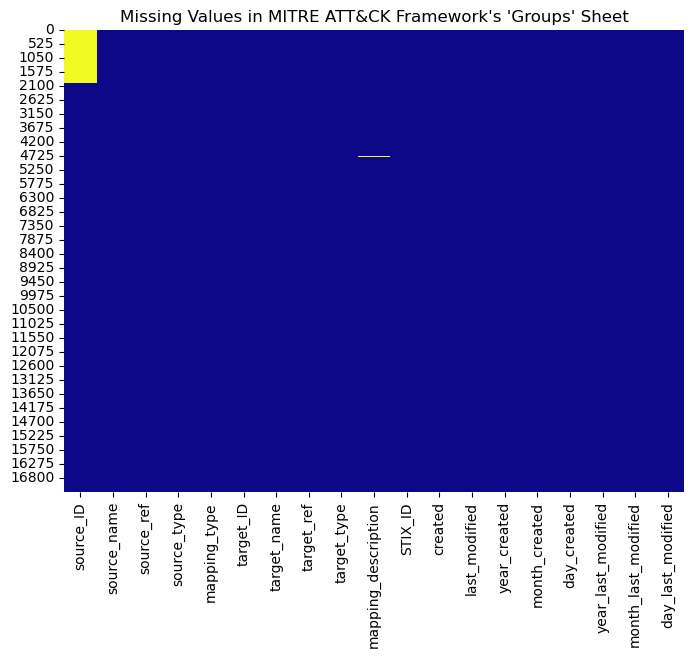

In [25]:
null_values = df_relationships.isnull() # Calculate null values
nulls = null_values.sum()
print('Null values in each column:')
print(nulls, '\n-----\n')

null_percentage = nulls / len(df_relationships) * 100
print('Null values as percentage of total observations:')
print(null_percentage, '\n-----\n') 

# Construct a missingness heatmap
plt.figure(figsize=(8,6)) # 800x600 px
sns.heatmap(null_values, cbar=False, cmap='plasma')
plt.title("Missing Values in MITRE ATT&CK Framework's 'Groups' Sheet")
plt.show()

## Checking for Duplicates
Next, we'll see which if any observations are duplicated. Seeing as there are none, we have no need to drop any records.

In [26]:
print('Number of duplicated rows:', df_relationships.duplicated().sum())

Number of duplicated rows: 0


## Exploring Various Groups
This section will be devoted to exploring the various threat actors in the dataset, their activity over time, and their associations with other groups, their attacks over the year, and their preferred days of attack. 

In [27]:
groups = ['Fancy Bear', 'Violet Typhoon', 'APT41', 'Dragonfly', 'Energetic Bear']
df_relationships[['source_ID, 'source']]

0        C0028
1        C0025
2        C0034
3        C0011
4        C0017
         ...  
17319    S0350
17320    S0350
17321    S0350
17322    S0350
17323    S0350
Name: source_ID, Length: 17324, dtype: object